In [1]:
import os

import numpy as np
import yaml
from astropy.io import ascii as asc
from astropy.time import Time
import astropy.units as u
import astropy.constants as c
from astropy.modeling import models, fitting

from matplotlib import pyplot as plt
%matplotlib inline

import supernova

In [2]:
TEST_FILE_DIR = '../data/line_info/testing/'
FIG_DIR = '../figures/'
DATA_DIR = '../data/line_info'

In [3]:
HA = 6563.0
SiII = 6355.0
FeII = 5169.0
IR_dates = Time(['2015-09-05','2015-10-05', '2015-10-10'])

In [4]:
sn15oz = supernova.LightCurve2('asassn-15oz')
texpl = Time(sn15oz.jdexpl, format='jd')

In [5]:
old_fitting = asc.read(os.path.join(TEST_FILE_DIR, 'HA-cachito_old.tab'))
new_fit_together = asc.read(os.path.join(TEST_FILE_DIR, 'HA-cachito.tab'))
new_fit_cachito = asc.read(os.path.join(TEST_FILE_DIR, 'cachito.tab'))
new_fit_HA = asc.read(os.path.join(TEST_FILE_DIR, 'HA.tab'))

In [6]:
def calc_velocity(obs_wl, rest_wl):
    velocity = c.c*(obs_wl/rest_wl - 1)
    return velocity

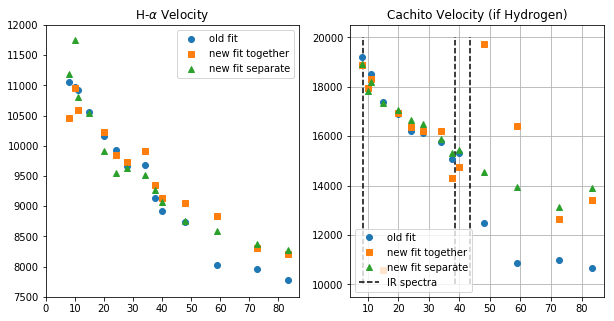

In [7]:
fig = plt.figure(figsize=[10, 5])
ax_HA = fig.add_subplot(1,2,1)
ax_cachito = fig.add_subplot(1,2,2)

ax_HA.plot((Time(old_fitting['date'])-texpl).value, -1*calc_velocity(old_fitting['vel1'], HA).to(u.km/u.s), 'o', label='old fit') 
ax_HA.plot((Time(new_fit_together['date'])-texpl).value, -1*calc_velocity(new_fit_together['vel1'], HA).to(u.km/u.s), 's', label='new fit together') 
ax_HA.plot((Time(new_fit_HA['date'])-texpl).value, -1*calc_velocity(new_fit_HA['vel0'], HA).to(u.km/u.s), '^', label='new fit separate') 
ax_HA.set_ylim(7500, 12000)
ax_HA.set_xticks(np.arange(0, 90, 10))
ax_HA.legend()
ax_HA.set_title(r'H-$\alpha$ Velocity')

ax_cachito.plot((Time(old_fitting['date'])-texpl).value, -1*calc_velocity(old_fitting['vel0'], HA).to(u.km/u.s), 'o', label='old fit') 
ax_cachito.plot((Time(new_fit_together['date'])-texpl).value, -1*calc_velocity(new_fit_together['vel0'], HA).to(u.km/u.s), 's', label='new fit together') 
ax_cachito.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(new_fit_cachito['vel0'], HA).to(u.km/u.s), '^', label='new fit separate') 
ax_cachito.set_xticks(np.arange(0, 90, 10))
ax_cachito.grid()
ax_cachito.set_title('Cachito Velocity (if Hydrogen)')
ax_cachito.vlines((IR_dates-texpl).value, linestyle='--', ymin=10000, ymax=20000, label='IR spectra')
ax_cachito.legend(loc='lower left')
plt.savefig(os.path.join(FIG_DIR, 'HA-cachito_velocity_test.pdf'))

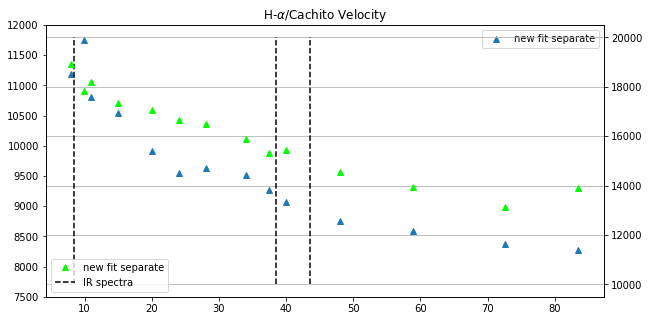

In [8]:
fig = plt.figure(figsize=[10, 5])
ax_HA = fig.add_subplot(1,1,1)
ax_cachito = ax_HA.twinx()

#ax_HA.plot((Time(old_fitting['date'])-texpl).value, -1*calc_velocity(old_fitting['vel1'], HA).to(u.km/u.s), 'o', label='old fit') 
#ax_HA.plot((Time(new_fit_together['date'])-texpl).value, -1*calc_velocity(new_fit_together['vel1'], HA).to(u.km/u.s), 's', label='new fit together') 
ax_HA.plot((Time(new_fit_HA['date'])-texpl).value, -1*calc_velocity(new_fit_HA['vel0'], HA).to(u.km/u.s), '^', label='new fit separate') 
ax_HA.set_ylim(7500, 12000)
ax_HA.set_xticks(np.arange(0, 90, 10))
ax_HA.legend()
ax_HA.set_title(r'H-$\alpha$/Cachito Velocity')

#ax_cachito.plot((Time(old_fitting['date'])-texpl).value, -1*calc_velocity(old_fitting['vel0'], HA).to(u.km/u.s), 'co', label='old fit') 
#ax_cachito.plot((Time(new_fit_together['date'])-texpl).value, -1*calc_velocity(new_fit_together['vel0'], HA).to(u.km/u.s), 'rs', label='new fit together') 
ax_cachito.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(new_fit_cachito['vel0'], HA).to(u.km/u.s), '^', color='lime', label='new fit separate') 
ax_cachito.set_xticks(np.arange(0, 90, 10))
ax_cachito.grid()
ax_cachito.vlines((IR_dates-texpl).value, linestyle='--', ymin=10000, ymax=20000, label='IR spectra')
ax_cachito.legend(loc='lower left')

# Fit Velocity

## Cachito Fit

In [9]:
phase_cachito = (Time(new_fit_cachito['date'])-texpl).value
velocity_cachito = -1*calc_velocity(new_fit_cachito['vel0'], HA).to(u.km/u.s).value

In [10]:
fitter_power = fitting.LevMarLSQFitter()
fitter_linear = fitting.LinearLSQFitter()
power_model = models.PowerLaw1D()
poly_model3 = models.Polynomial1D(degree=3)
poly_model4 = models.Polynomial1D(degree=4)
poly_model5 = models.Polynomial1D(degree=5)

In [11]:
power_fit_cachito = fitter_power(power_model, phase_cachito, velocity_cachito)

In [12]:
poly_fit3_cachito = fitter_linear(poly_model3, phase_cachito, velocity_cachito)
poly_fit4_cachito = fitter_linear(poly_model4, phase_cachito, velocity_cachito)
poly_fit5_cachito = fitter_linear(poly_model5, phase_cachito, velocity_cachito)

Power law std = 391.2385538728443
Deg 4 polynomial std = 193.85033736603393
Deg 3 polynomial std = 246.76558954290823


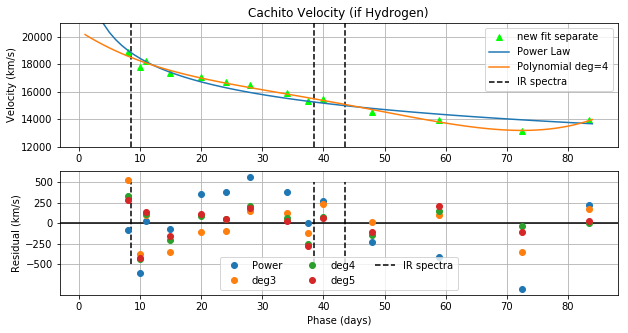

In [13]:
fit_time = np.arange(1, phase_cachito[-1]+1,1)

fig = plt.figure(figsize=[10, 5])
ax_cachito = fig.add_subplot(2,1,1)
ax_resid = fig.add_subplot(2,1,2, sharex=ax_cachito)
ax_cachito.plot(phase_cachito, velocity_cachito, '^', color='lime', label='new fit separate') 
ax_cachito.set_xticks(np.arange(0, 90, 10))
ax_cachito.grid()
ax_cachito.plot(fit_time, power_fit_cachito(fit_time), label='Power Law')
ax_cachito.plot(fit_time, poly_fit4_cachito(fit_time), label='Polynomial deg={}'.format(poly_model4.degree))
ax_cachito.set_title('Cachito Velocity (if Hydrogen)')
ax_cachito.vlines((IR_dates-texpl).value, linestyle='--', ymin=12000, ymax=21000, label='IR spectra')
ax_cachito.set_ylabel('Velocity (km/s)')

ax_cachito.set_ylim(ymin=12000, ymax=21000)
ax_cachito.legend(loc='best')

ax_resid.axhline(0, color='k')
ax_resid.vlines((IR_dates-texpl).value, linestyle='--', ymin=-500, ymax=500, label='IR spectra')
ax_resid.plot(phase_cachito, velocity_cachito - power_fit_cachito(phase_cachito), 'o', label='Power')
ax_resid.plot(phase_cachito, velocity_cachito - poly_fit3_cachito(phase_cachito), 'o', label='deg3')
ax_resid.plot(phase_cachito, velocity_cachito - poly_fit4_cachito(phase_cachito), 'o', label='deg4')
ax_resid.plot(phase_cachito, velocity_cachito - poly_fit5_cachito(phase_cachito), 'o', label='deg5')
ax_resid.set_yticks([-500, -250, 0, 250, 500])
ax_resid.grid()
ax_resid.legend(loc='best', ncol=3)
ax_resid.set_ylabel('Residual (km/s)')
ax_resid.set_xlabel('Phase (days)')

plt.savefig(os.path.join(FIG_DIR, 'cachito_velocity_fit.pdf'))

print('Power law std = {}'.format(np.std(velocity_cachito - power_fit_cachito(phase_cachito))))
print('Deg 4 polynomial std = {}'.format(np.std(velocity_cachito - poly_fit4_cachito(phase_cachito))))
print('Deg 3 polynomial std = {}'.format(np.std(velocity_cachito - poly_fit3_cachito(phase_cachito))))

Speaking with Stefano - we're going to use the power law fit; Nugent (2006) and Faran (2014) both fit power laws

## H-Alpha Fit

In [14]:
phase_HA = (Time(new_fit_HA['date'])-texpl).value
velocity_HA = -1*calc_velocity(new_fit_HA['vel0'], HA).to(u.km/u.s).value

In [15]:
fitter_power = fitting.LevMarLSQFitter()
fitter_linear = fitting.LinearLSQFitter()
power_model = models.PowerLaw1D()
poly_model3 = models.Polynomial1D(degree=3)
poly_model4 = models.Polynomial1D(degree=4)
poly_model5 = models.Polynomial1D(degree=5)

In [16]:
power_fit_HA = fitter_power(power_model, phase_HA, velocity_HA)

In [17]:
poly_fit3_HA = fitter_linear(poly_model3, phase_HA, velocity_HA)
poly_fit4_HA = fitter_linear(poly_model4, phase_HA, velocity_HA)
poly_fit5_HA = fitter_linear(poly_model5, phase_HA, velocity_HA)

Power law std = 215.510555052082
Deg 4 polynomial std = 209.33691258591205
Deg 3 polynomial std = 221.00547094202278


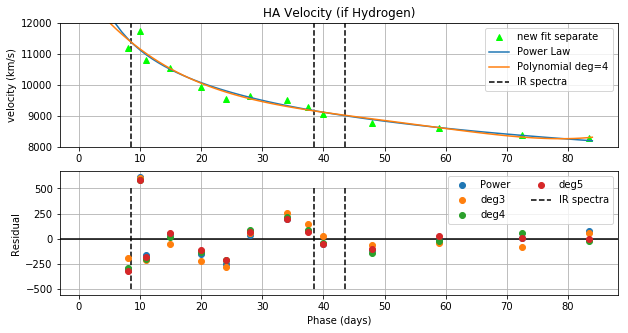

In [18]:
fit_time = np.arange(1, phase_HA[-1]+1,1)

fig = plt.figure(figsize=[10, 5])
ax_HA = fig.add_subplot(2,1,1)
ax_resid = fig.add_subplot(2,1,2, sharex=ax_HA)
ax_HA.plot(phase_HA, velocity_HA, '^', color='lime', label='new fit separate') 
ax_HA.set_xticks(np.arange(0, 90, 10))
ax_HA.grid()
ax_HA.plot(fit_time, power_fit_HA(fit_time), label='Power Law')
ax_HA.plot(fit_time, poly_fit4_HA(fit_time), label='Polynomial deg={}'.format(poly_model4.degree))
ax_HA.set_title('HA Velocity (if Hydrogen)')
ax_HA.vlines((IR_dates-texpl).value, linestyle='--', ymin=8000, ymax=12000, label='IR spectra')
ax_HA.set_ylim(ymin=8000, ymax=12000)
ax_HA.legend(loc='best')
ax_HA.set_ylabel('velocity (km/s)')

ax_resid.axhline(0, color='k')
ax_resid.vlines((IR_dates-texpl).value, linestyle='--', ymin=-500, ymax=500, label='IR spectra')
ax_resid.plot(phase_HA, velocity_HA - power_fit_HA(phase_HA), 'o', label='Power')
ax_resid.plot(phase_HA, velocity_HA - poly_fit3_HA(phase_HA), 'o', label='deg3')
ax_resid.plot(phase_HA, velocity_HA - poly_fit4_HA(phase_HA), 'o', label='deg4')
ax_resid.plot(phase_HA, velocity_HA - poly_fit5_HA(phase_HA), 'o', label='deg5')
ax_resid.grid()
ax_resid.legend(loc='best', ncol=2)
ax_resid.set_xlabel('Phase (days)')
ax_resid.set_ylabel('Residual')

print('Power law std = {}'.format(np.std(velocity_HA - power_fit_HA(phase_HA))))
print('Deg 4 polynomial std = {}'.format(np.std(velocity_HA - poly_fit4_HA(phase_HA))))
print('Deg 3 polynomial std = {}'.format(np.std(velocity_HA - poly_fit3_HA(phase_HA))))
plt.savefig(os.path.join(FIG_DIR, 'HA_velocity_fit.pdf'))

# Look at Silicon Velocity and fit the FeII Velocity

In [19]:
tbdata_feII = asc.read(os.path.join(DATA_DIR, 'FeII_multi.tab'))
tbdata_feII.remove_columns(['vel1', 'vel_err_left_1', 'vel_err_right_1', 'vel_pew_1', 'vel_pew_err1'])
tbdata_feII.rename_column('vel0', 'velocity')
tbdata_feII.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_feII.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_feII.rename_column('vel_pew_0', 'pew')
tbdata_feII.rename_column('vel_pew_err0', 'pew_err')

In [20]:
phase_feII = (Time(tbdata_feII['date'])-texpl).value
velocity_feII = -1*calc_velocity(tbdata_feII['velocity'], FeII).to(u.km/u.s)

In [21]:
power_model_feII = models.PowerLaw1D(alpha=power_fit_cachito.alpha, x_0=power_fit_cachito.x_0)
power_fit_feII = fitter_power(power_model_feII, phase_feII, velocity_feII)

Power law std = 342.44842167279404 km / s


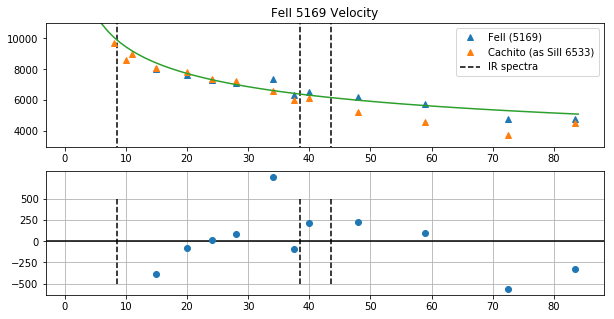

In [22]:
fig = plt.figure(figsize=[10, 5])
ax_Fe = fig.add_subplot(2,1,1)
ax_resid = fig.add_subplot(2,1,2, sharex=ax_Fe)

ax_Fe.plot(phase_feII, velocity_feII, '^', label='FeII (5169)') 
ax_Fe.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(new_fit_cachito['vel0'], SiII).to(u.km/u.s), '^', label='Cachito (as SiII 6533)')
ax_Fe.plot(fit_time, power_fit_feII(fit_time))
ax_Fe.vlines((IR_dates-texpl).value, linestyle='--', ymin=-3000, ymax=12000, label='IR spectra')
ax_Fe.set_xticks(np.arange(0, 90, 10))
ax_Fe.legend()
ax_Fe.set_title(r'FeII 5169 Velocity')
ax_Fe.set_ylim(3000, 11000)

ax_resid.axhline(0, color='k')
ax_resid.plot(phase_feII, velocity_feII - power_fit_feII(phase_feII), 'o')
ax_resid.set_yticks([-500, -250, 0, 250, 500])
ax_resid.grid()
ax_resid.vlines((IR_dates-texpl).value, linestyle='--', ymin=-500, ymax=500, label='IR spectra')
print('Power law std = {}'.format(np.std(velocity_feII - power_fit_feII(phase_feII))))

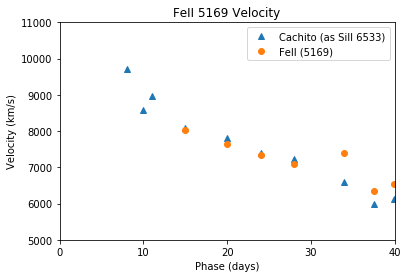

In [28]:
fig = plt.figure()
ax_Fe = fig.add_subplot(1,1,1)

ax_Fe.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(new_fit_cachito['vel0'], SiII).to(u.km/u.s), '^', label='Cachito (as SiII 6533)')
#ax_Fe.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(new_fit_together['vel0'], SiII).to(u.km/u.s), '^', label='Cachito (as SiII 6533); new joint fit', alpha=0.25)
#ax_Fe.plot((Time(new_fit_cachito['date'])-texpl).value, -1*calc_velocity(old_fitting['vel0'], SiII).to(u.km/u.s), '^', label='Cachito (as SiII 6533); old joint fit', alpha=0.25)
ax_Fe.plot(phase_feII, velocity_feII, 'o', label='FeII (5169)') 

ax_Fe.set_xticks(np.arange(0, 90, 10))
ax_Fe.legend()
ax_Fe.set_title(r'FeII 5169 Velocity')
ax_Fe.set_ylim(5000, 11000)
ax_Fe.set_xlim(0, 40)
ax_Fe.set_xlabel('Phase (days)')
ax_Fe.set_ylabel('Velocity (km/s)')
plt.savefig(os.path.join(FIG_DIR, 'cachito_fe_vel_comp.pdf'))

In [29]:
cp ../figures/cachito_fe_vel_comp.pdf ../paper/figures/